### Import Libraries

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import preprocessing tools
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

# import regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# import model evaluation and selection tools
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib # to save the model

### Load Data

In [141]:
data = pd.read_csv('data.csv')
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [142]:
# checking for duplicate rows and null values
print(f"Duplicate rows: {data.duplicated().sum()}")
print(f"\nNull values:\n{data.isnull().sum()}")

Duplicate rows: 0

Null values:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


### Exploratory Data Analysis (EDA)

In [143]:
data.shape

(4600, 18)

In [144]:
data.info()
# note bedrooms and bathrooms are float data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [145]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [146]:
# convert 'date' column to datetime data type
data.date = pd.to_datetime(data.date)
data["yr_sold"] = data["date"].dt.year
data.yr_sold.value_counts()
# all houses were sold in 2014

yr_sold
2014    4600
Name: count, dtype: int64

In [147]:
# new column 'house_age' to represent age of house at the time of sale
data['house_age'] = data.yr_sold - data.yr_built
data.house_age.describe()

count    4600.000000
mean       43.213696
std        29.731848
min         0.000000
25%        17.000000
50%        38.000000
75%        63.000000
max       114.000000
Name: house_age, dtype: float64

In [148]:
data.bedrooms.value_counts()

bedrooms
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: count, dtype: int64

In [149]:
# bedrooms can be integer values
data['bedrooms'] = data['bedrooms'].astype(int)
data.bedrooms.value_counts()

bedrooms
3    2032
4    1531
2     566
5     353
6      61
1      38
7      14
8       2
0       2
9       1
Name: count, dtype: int64

In [150]:
# unrealistic values of 0 bedrooms and outlier values of 8 and 9 bedrooms
check_bedrooms = [0, 8, 9]
data[data['bedrooms'].isin(check_bedrooms)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,yr_sold,house_age
241,2014-05-07,599999.0,9,4.50,3830,6988,2.5,0,0,3,2450,1380,1938,2003,8809 Densmore Ave N,Seattle,WA 98103,USA,2014,76
1500,2014-05-28,1970000.0,8,3.50,4440,6480,2.0,0,3,5,3140,1300,1959,0,1210 22nd Ave E,Seattle,WA 98112,USA,2014,55
2365,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,USA,2014,24
3209,2014-06-24,1295648.0,0,0.00,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,USA,2014,24
3911,2014-07-03,340000.0,8,2.75,2790,6695,1.0,0,0,3,1470,1320,1977,2004,17512 Corliss Ave N,Shoreline,WA 98133,USA,2014,37


In [151]:
data.bathrooms.value_counts()
# after research a full bathroom containing sink, toilet, shower/bathtub is counted as 1.0
# three-quater bathroom contain sink, toilet and shower(no tub) is counted as 0.75
# half bathroom contain sink and toilet only is counted as 0.5
# one-quater bathroom contain toilet or sink only is counted as 0.25 this is rare as both sink and toilet should be there in a bathroom
# each utility (shower, tub, toilet, sink) is counted as 0.25

bathrooms
2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: count, dtype: int64

In [152]:
# new columns 'bathroom_full', 'bathroom_half', 'bathroom_quarter' to represent number of full, half and quarter bathrooms
for index, row in data.iterrows():
    full = int(row['bathrooms'])
    remainder = row['bathrooms'] - full
    half = 0
    quarter = 0
    if remainder >= 0.5:
        half = 1
        remainder -= 0.5
    if remainder >= 0.25:
        quarter = 1
    data.at[index, 'bathroom_full'] = full
    data.at[index, 'bathroom_half'] = half
    data.at[index, 'bathroom_quarter'] = quarter

In [153]:
data[['bathrooms', 'bathroom_full', 'bathroom_half', 'bathroom_quarter']].sample(10)

,bathrooms,bathroom_full,bathroom_half,bathroom_quarter
826,1.50,1.0,1.0,0.0
2167,2.50,2.0,1.0,0.0
4291,1.00,1.0,0.0,0.0
1801,1.00,1.0,0.0,0.0
2081,1.00,1.0,0.0,0.0
1692,1.00,1.0,0.0,0.0
4513,3.00,3.0,0.0,0.0
3100,2.50,2.0,1.0,0.0
622,2.50,2.0,1.0,0.0
359,1.75,1.0,1.0,1.0


In [154]:
# unrealistic values of 0.00 bathrooms and outlier values of 5.75, 6.25, 6.50, 6.75, 8.00 bathrooms
check_bathrooms = [0.00, 5.75, 6.25, 6.50, 6.75, 8.0]
data[data['bathrooms'].isin(check_bathrooms)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,yr_sold,house_age,bathroom_full,bathroom_half,bathroom_quarter
122,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,0,4,3,...,0,26408 NE 70th St,Redmond,WA 98053,USA,2014,15,8.0,0.0,0.0
291,2014-05-07,540000.0,7,5.75,3700,7647,2.0,0,1,3,...,1984,15007-15299 37th Ave NE,Lake Forest Park,WA 98155,USA,2014,66,5.0,1.0,1.0
462,2014-05-09,2238888.0,5,6.50,7270,130017,2.0,0,0,3,...,0,7070 270th Pl SE,Issaquah,WA 98029,USA,2014,4,6.0,1.0,0.0
2328,2014-06-11,2888000.0,5,6.25,8670,64033,2.0,0,4,3,...,2003,1291 NW Elford Dr,Seattle,WA 98177,USA,2014,49,6.0,0.0,1.0
2365,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,3,...,2009,814 E Howe St,Seattle,WA 98102,USA,2014,24,0.0,0.0,0.0
2654,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,3,...,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA,2014,31,6.0,1.0,1.0
3209,2014-06-24,1295648.0,0,0.00,4810,28008,2.0,0,0,3,...,2009,20418 NE 64th Pl,Redmond,WA 98053,USA,2014,24,0.0,0.0,0.0
4575,2014-07-02,0.0,5,6.25,8020,21738,2.0,0,0,3,...,0,2 Crescent Key,Bellevue,WA 98006,USA,2014,13,6.0,0.0,1.0


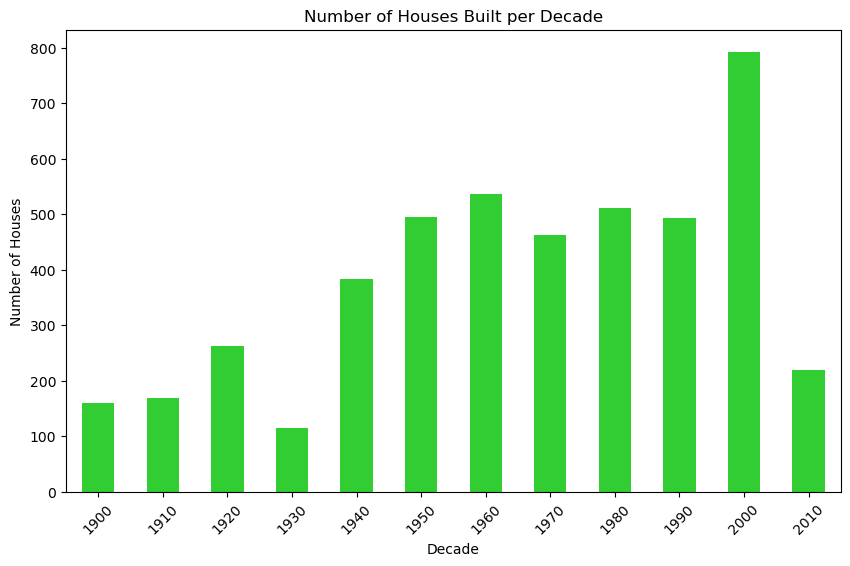

In [155]:
# inspect yr_built column by plotting a countplot of houses built per decade
decades = data.yr_built // 10 * 10
decade_counts = decades.value_counts().sort_index()

plt.figure(figsize=(10, 6))
decade_counts.plot(kind='bar', color='limegreen')
plt.title('Number of Houses Built per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)
plt.show()

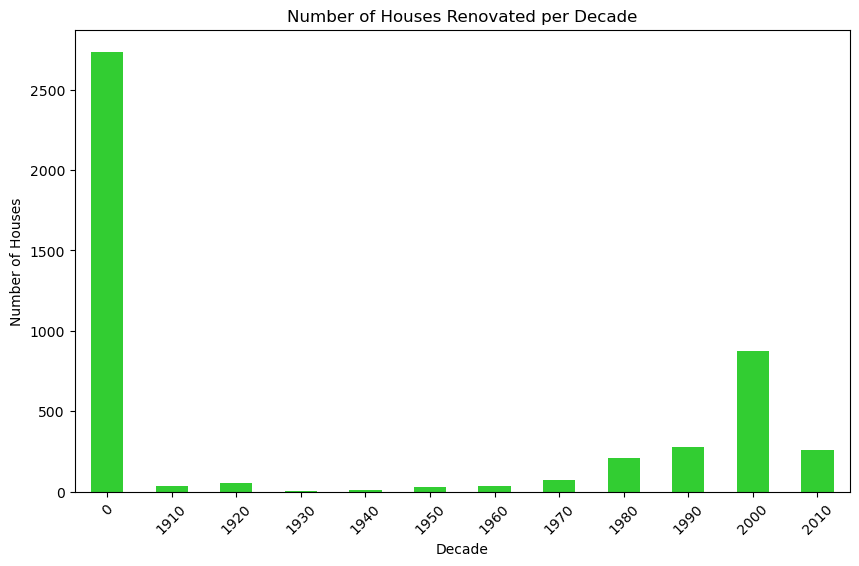

In [156]:
# inspect yr_renovated column by plotting a countplot of houses renovated per decade
renovation_decades = data.yr_renovated // 10 * 10
renovation_decade_counts = renovation_decades.value_counts().sort_index()

plt.figure(figsize=(10, 6))
renovation_decade_counts.plot(kind='bar', color='limegreen')
plt.title('Number of Houses Renovated per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)
plt.show()
# half of the houses were never renovated (yr_renovated = 0)

In [157]:
# new column 'renovated' to indicate whether a house has been renovated or not
data['has_renovated'] = data['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)
data.has_renovated.value_counts()

has_renovated
0    2735
1    1865
Name: count, dtype: int64

In [158]:
# new column state and zip code extract from 'statezip' column
data['state'] = data['statezip'].apply(lambda x: x.split(' ')[0])
data['zip_code'] = data['statezip'].apply(lambda x: x.split(' ')[1])
print(data.state.value_counts())
print(data.zip_code.value_counts())

state
WA    4600
Name: count, dtype: int64
zip_code
98103    148
98052    135
98117    132
98115    130
98006    110
        ... 
98047      6
98288      3
98050      2
98354      2
98068      1
Name: count, Length: 77, dtype: int64


In [159]:
# inspect street, city, state, zip_code, country columns
data[['street', 'city', 'state', 'zip_code', 'country']].nunique()

# the dataset contains houses from capital city of USA Washington only
# street and zip_code column has too many unique values
# city column has 44 unique values which may be useful for prediction

street      4525
city          44
state          1
zip_code      77
country        1
dtype: int64

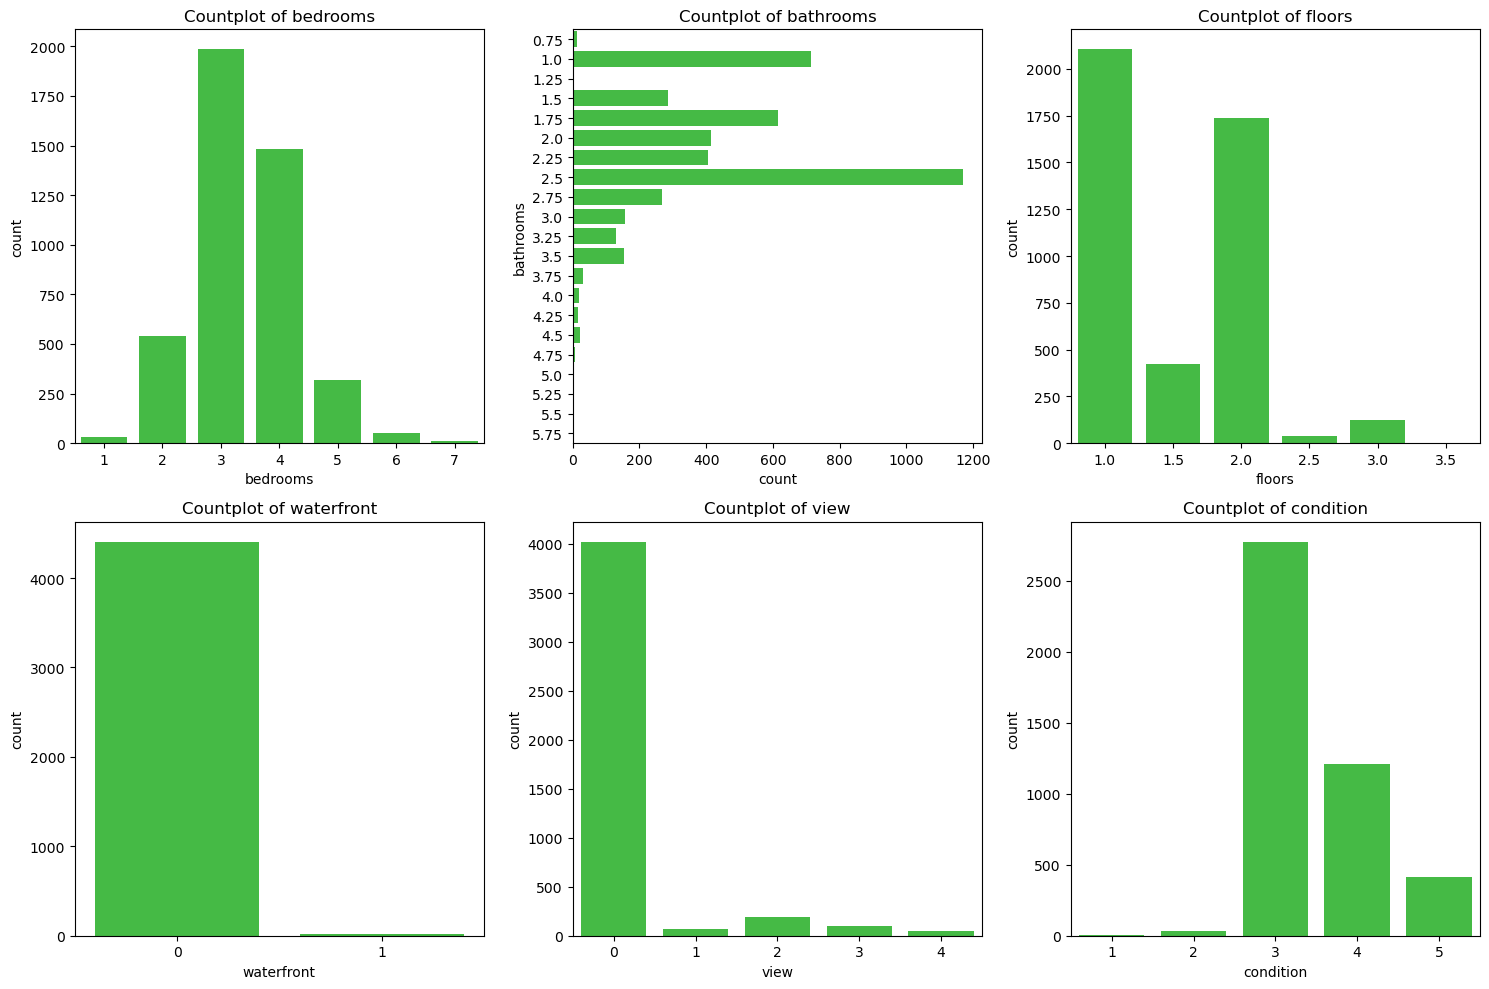

In [233]:
# inspect bedroom, bathroom, floors, waterfront, view, condition columns
cols_to_count_plot = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition']

plt.figure(figsize=(15, 10))
for col in cols_to_count_plot:
    plt.subplot(2, 3, cols_to_count_plot.index(col) + 1)
    if col == 'bathrooms':
        # horizontal countplot for better visibility
        sns.countplot(data=data, y=col, color='limegreen')
    else:
        sns.countplot(data=data, x=col, color='limegreen')
    plt.title(f'Countplot of {col}')
    plt.tight_layout()
plt.show()

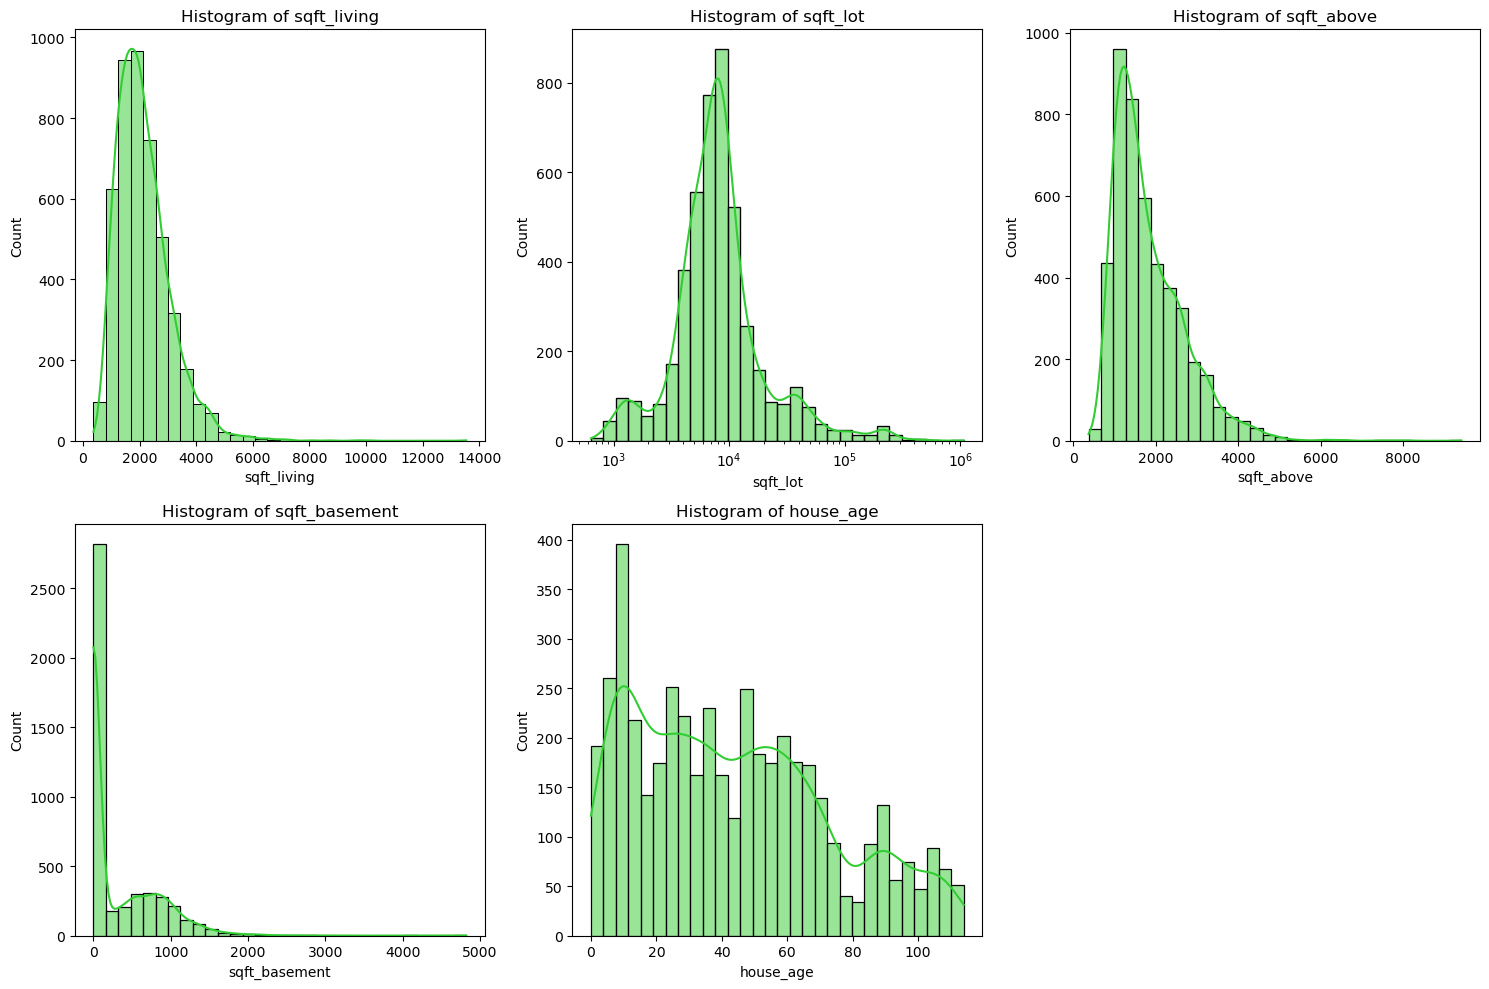

In [161]:
# inspect sqft_living, sqft_lot, sqft_above, sqft_basement columns
cols_to_hist_plot = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'house_age']

plt.figure(figsize=(15, 10))
for col in cols_to_hist_plot:
    plt.subplot(2, 3, cols_to_hist_plot.index(col) + 1)
    # apply log scale to sqft_lot due to large range of values
    if col == 'sqft_lot':
        sns.histplot(data=data, x=col, bins=30, log_scale=True, color='limegreen', kde=True)
    else:
        sns.histplot(data=data, x=col, bins=30, color='limegreen', kde=True)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
plt.show()


# half of the houses have no basement (sqft_basement = 0)

In [162]:
data.price.describe()
# there are house price with 0 value which is not realistic

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

In [163]:
# check prices with 0 value
print(data[data['price'] == 0].shape)

# drop rows with 0 price
data = data[data['price'] != 0].copy()

print(data.price.describe())

(49, 26)
count    4.551000e+03
mean     5.579059e+05
std      5.639299e+05
min      7.800000e+03
25%      3.262643e+05
50%      4.650000e+05
75%      6.575000e+05
max      2.659000e+07
Name: price, dtype: float64


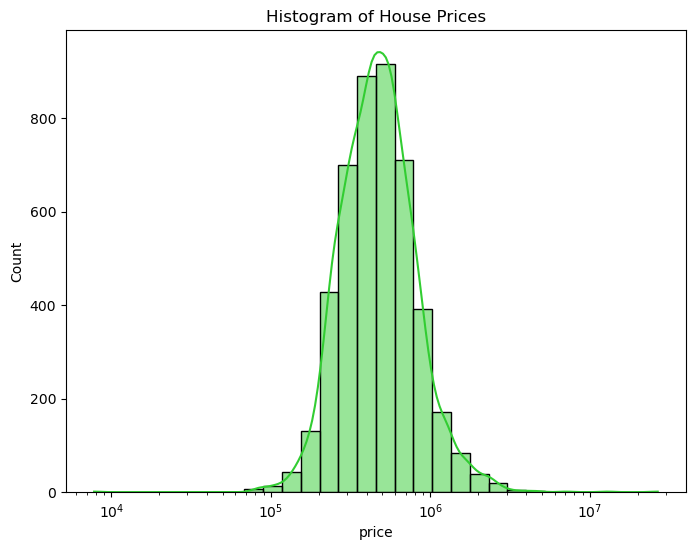

In [164]:
# inspect price column
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='price', bins=30, log_scale=True, color='limegreen', kde=True)
plt.title('Histogram of House Prices')
plt.show()

In [165]:
# new column price_per_sqft_living
data['price_per_sqft_living'] = data['price'] / data['sqft_living']
print(data.price_per_sqft_living.describe())

count     4551.000000
mean       268.738914
std        358.351177
min         10.000000
25%        182.889483
50%        245.424837
75%        315.733720
max      22533.898305
Name: price_per_sqft_living, dtype: float64


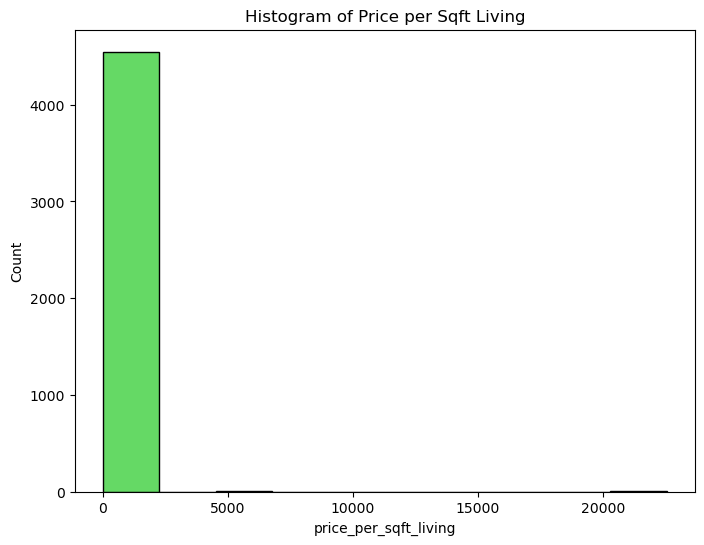

In [166]:
# inspect price_per_sqft_living column
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='price_per_sqft_living', bins=10, color='limegreen')
plt.title('Histogram of Price per Sqft Living')
plt.show()

# outliers of 5000 and 20000 values in price_per_sqft_living which are abnormally high
# it may cause by incorrect sqft_living or price values

In [167]:
# check the rows with price_per_sqft_living greater than 1000
data[data['price_per_sqft_living'] > 1000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,country,yr_sold,house_age,bathroom_full,bathroom_half,bathroom_quarter,has_renovated,state,zip_code,price_per_sqft_living
4346,2014-06-23,1.289900e+07,3,2.5,2190,11394,1.0,0,0,3,...,USA,2014,58,2.0,1.0,0.0,1,WA,98199,5889.954338
4347,2014-05-08,2.110000e+06,4,1.0,2100,9200,1.0,0,0,3,...,USA,2014,55,1.0,0.0,0.0,1,WA,98168,1004.761905
4348,2014-05-05,2.199900e+06,4,1.5,1120,5427,1.0,0,0,3,...,USA,2014,45,1.0,1.0,0.0,1,WA,98042,1964.196429
4350,2014-07-03,2.659000e+07,3,2.0,1180,7793,1.0,0,0,4,...,USA,2014,22,2.0,0.0,0.0,0,WA,98031,22533.898305
4465,2014-06-05,2.560498e+06,3,2.5,1710,1664,2.0,0,0,5,...,USA,2014,11,2.0,1.0,0.0,0,WA,98199,1497.367446


In [168]:
# remove outliers where price_per_sqft_living is greater than 1000
data = data[data['price_per_sqft_living'] <= 1000].copy()

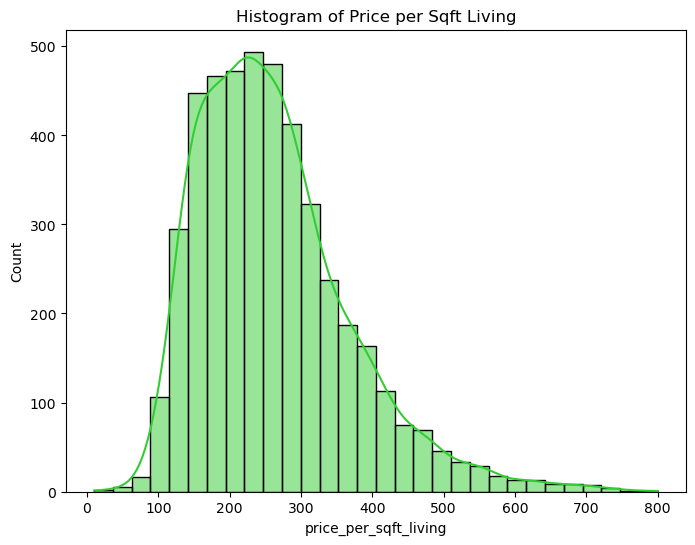

In [169]:
# inspect price_per_sqft_living column after removing outliers
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='price_per_sqft_living', bins=30, color='limegreen', kde=True)
plt.title('Histogram of Price per Sqft Living')
plt.show()

In [170]:
# further remove outliers using IQR method for all numerical columns
for col in data.select_dtypes(include='number').columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

price: 235 outliers
bedrooms: 115 outliers
bathrooms: 130 outliers
sqft_living: 128 outliers
sqft_lot: 540 outliers
floors: 0 outliers
waterfront: 30 outliers
view: 448 outliers
condition: 6 outliers
sqft_above: 111 outliers
sqft_basement: 83 outliers
yr_built: 0 outliers
yr_renovated: 0 outliers
yr_sold: 0 outliers
house_age: 0 outliers
bathroom_full: 94 outliers
bathroom_half: 0 outliers
bathroom_quarter: 0 outliers
has_renovated: 0 outliers
price_per_sqft_living: 132 outliers


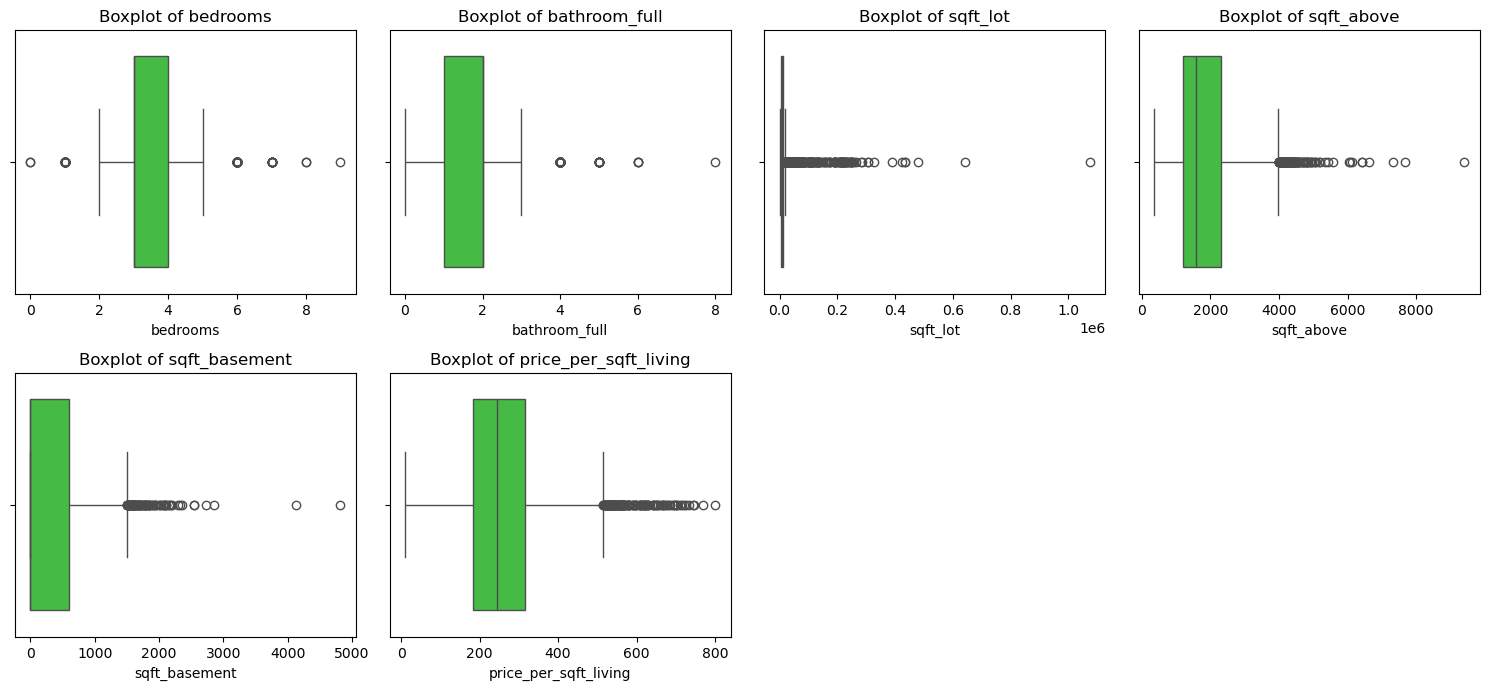

In [171]:
# boxplot to visualize outliers in numerical columns
cols_to_check_outliers = ['bedrooms', 'bathroom_full', 'sqft_lot', 'sqft_above', 'sqft_basement', 'price_per_sqft_living']

plt.figure(figsize=(15, 10))
for col in cols_to_check_outliers:
    plt.subplot(3, 4, cols_to_check_outliers.index(col) + 1)
    sns.boxplot(data=data, x=col, color='limegreen')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [172]:
data = data[data['bedrooms'] > 0]
data = data[data['bedrooms'] < 8]
data = data[data['bathroom_full'] < 6]
data = data[data['sqft_lot'] < 200000]
data = data[data['sqft_above'] < 5000]
data = data[data['sqft_basement'] < 2500]
data = data[data['price_per_sqft_living'] < 600]

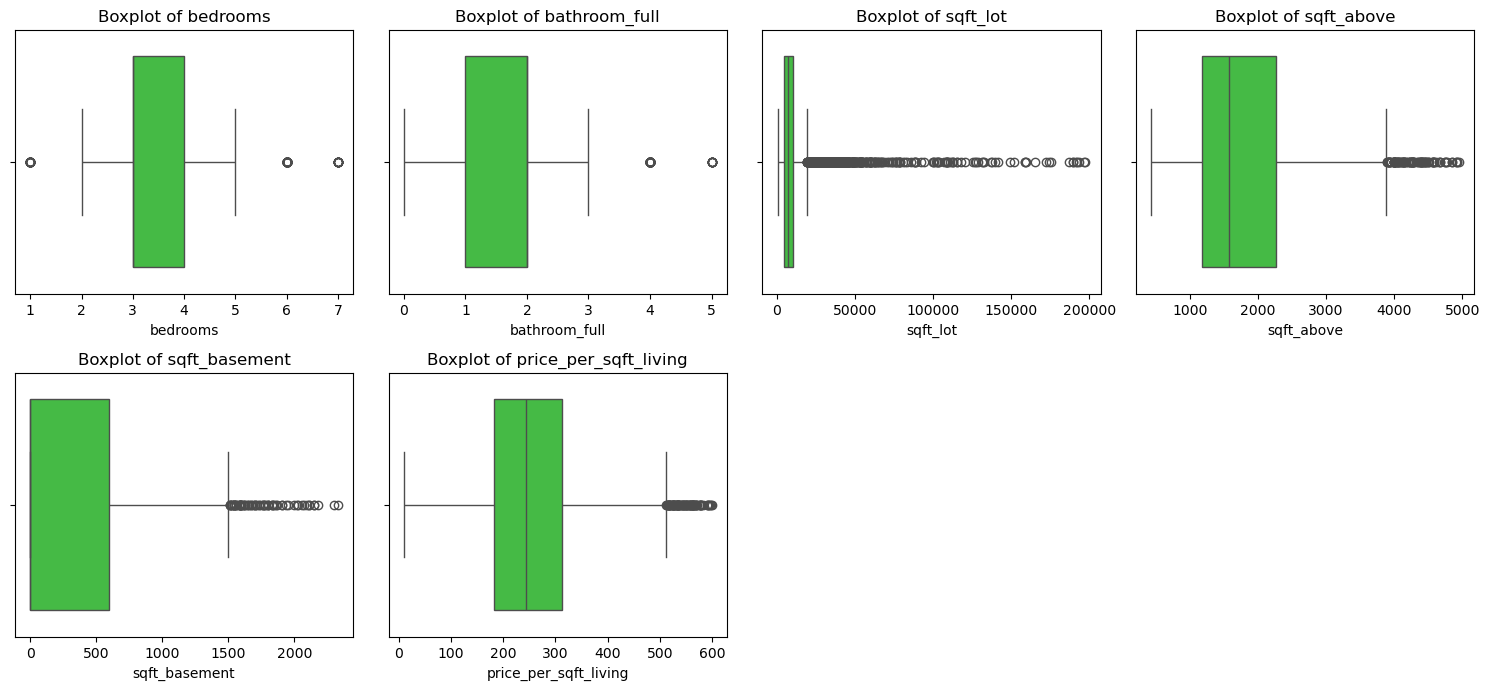

In [173]:
# boxplot to visualize after removing outliers
plt.figure(figsize=(15, 10))
for col in cols_to_check_outliers:
    plt.subplot(3, 4, cols_to_check_outliers.index(col) + 1)
    sns.boxplot(data=data, x=col, color='limegreen')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

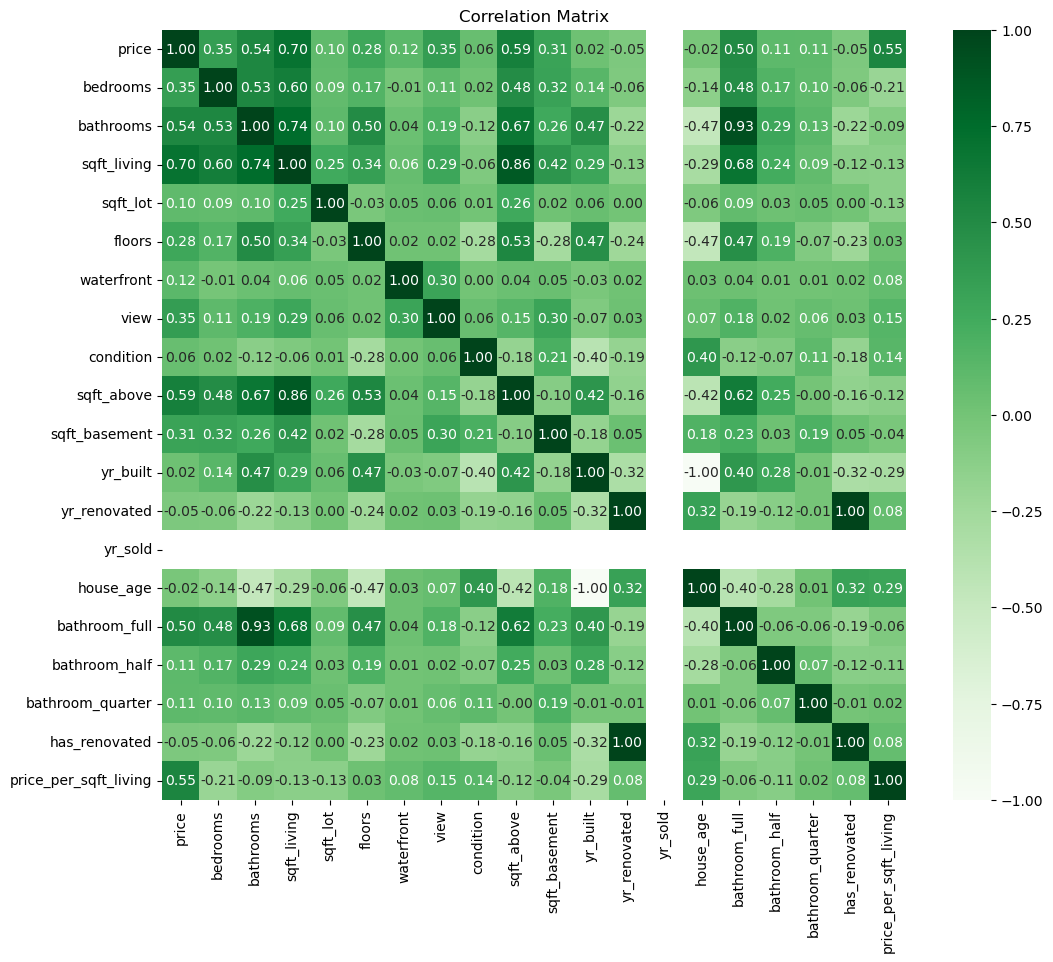

In [174]:
# correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

In [175]:
# total 44 unique cities
data.city.nunique()

44

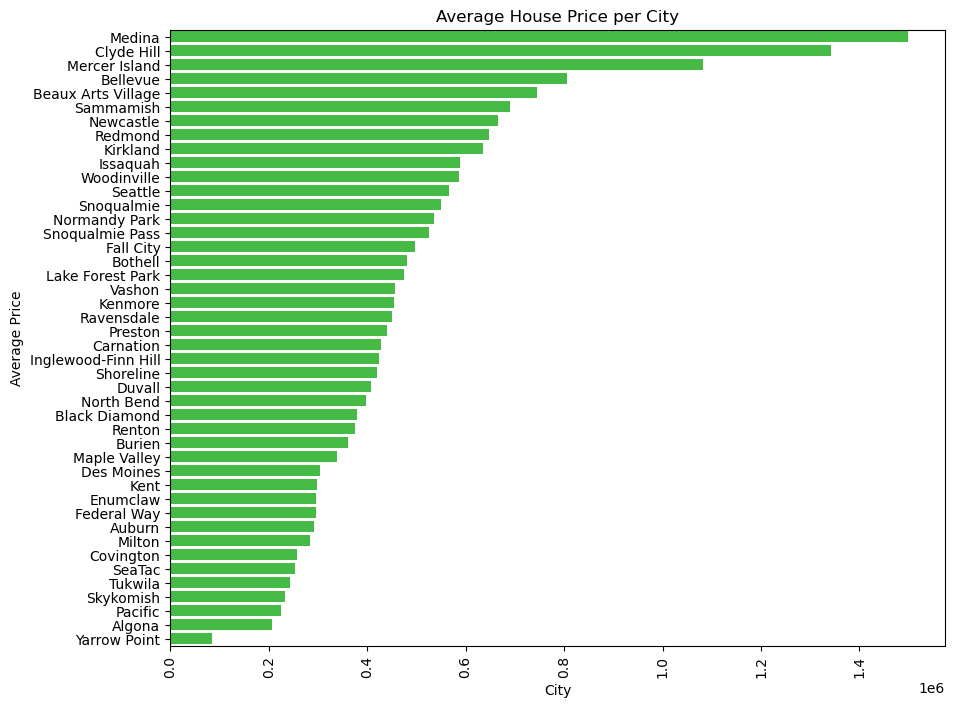

In [176]:
# group by city to get average house price per city
avg_price_per_city = data.groupby(by='city')['price'].mean().sort_values(ascending=False)

# plot average house price
plt.figure(figsize=(10, 8))
sns.barplot(x=avg_price_per_city.values , y=avg_price_per_city.index, color='limegreen')
plt.xticks(rotation=90)
plt.title('Average House Price per City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.show()

In [177]:
# Drop irrelevant columns
cols_to_drop = ['date', 'yr_built', 'yr_renovated', 'street', 'statezip', 'country', 'yr_sold', 'state', 'zip_code', 'bathrooms', 'price_per_sqft_living']
cleaned_data = data.drop(columns=cols_to_drop)

In [178]:
print(cleaned_data.shape)
print(cleaned_data.columns)

(4429, 16)
Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'sqft_above', 'sqft_basement', 'city', 'house_age',
       'bathroom_full', 'bathroom_half', 'bathroom_quarter', 'has_renovated'],
      dtype='object')


In [179]:
cleaned_data.to_csv('cleaned_data.csv', index=False)

### Model Training

In [180]:
cleaned_data = pd.read_csv('cleaned_data.csv')

In [181]:
# encode city column using one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded = encoder.fit_transform(cleaned_data[['city']])
encoded_df = pd.DataFrame(
    encoded, 
    columns=encoder.get_feature_names_out(['city']),
    index=cleaned_data.index
)

cleaned_data = pd.concat([cleaned_data.drop(columns=['city']), encoded_df], axis=1)

In [182]:
cleaned_data_raw = cleaned_data.copy()

In [183]:
# standardize numerical columns
discrete_cols = ['bedrooms', 'floors', 'view', 'condition', 'bathroom_full']
continuous_cols = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'house_age']

# initialize scalers
discrete_scaler = MinMaxScaler()
continuous_scaler = StandardScaler()

# scale the columns
cleaned_data[discrete_cols] = discrete_scaler.fit_transform(cleaned_data[discrete_cols])
cleaned_data[continuous_cols] = continuous_scaler.fit_transform(cleaned_data[continuous_cols])

In [184]:
# Split dataset into training and testing sets
x = cleaned_data.drop(columns='price')
y = cleaned_data['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

print(f"Training set size: {x_train.shape}")
print(f"Testing set size: {x_test.shape}")

Training set size: (3100, 57)
Testing set size: (1329, 57)


In [185]:
# Linear Regression Model
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [186]:
# Predictions on test sets
y_pred = model_LR.predict(x_test)

In [187]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error: 108097.06
Mean Squared Error: 28163809404.06
Root Mean Squared Error: 167820.77
R² Score: 0.7206


In [188]:
# Cross validation using k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=123)
cv_scores = cross_val_score(model_LR, x, y, cv=kf, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print(f"Cross-validation RMSE scores: {cv_rmse_scores}")
print(f"Average CV RMSE: {cv_rmse_scores.mean():.2f}")

Cross-validation RMSE scores: [168452.68484297 164483.64337141 157722.27187424 170315.74161143
 172153.73970433]
Average CV RMSE: 166625.62


In [ ]:
# train multiple regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# function to perform model selection
def model_evaluate(models, x_train, y_train, x_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        results[name] = {
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2
        }
    return pd.DataFrame(results).T

model_performance = model_evaluate(models, x_train, y_train, x_test, y_test)
print(model_performance)

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.893e+13, tolerance: 2.872e+10
  model = cd_fast.enet_coordinate_descent(


                             MAE           MSE           RMSE        R2
Linear Regression  108097.058941  2.816381e+10  167820.765712  0.720570
Ridge              108484.375675  2.827086e+10  168139.417263  0.719508
Lasso              108038.513469  2.814200e+10  167755.778479  0.720787
KNN                114161.323763  3.517898e+10  187560.596948  0.650969
Decision Tree      142440.132675  5.106467e+10  225974.926231  0.493358
Random Forest      105098.122891  2.937058e+10  171378.472550  0.708597
Gradient Boosting  105030.908581  2.672460e+10  163476.605489  0.734850


In [190]:
# function to perform cross validation for model comparison
def cross_validation(models, x, y, n_splits=5):
    results = {}
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=123)
    for name, model in models.items():
        cv_scores = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')
        cv_rmse_scores = np.sqrt(-cv_scores)
        results[name] = {
            'CV_RMSE_scores': cv_rmse_scores,
            'CV_RMSE_Mean': cv_rmse_scores.mean(),
            'CV_RMSE_Std': cv_rmse_scores.std()
        }
    return pd.DataFrame(results).T

pd.set_option('display.max_colwidth', None)

cv_performance = cross_validation(models, x, y)
print(cv_performance)

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.674e+13, tolerance: 3.406e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.466e+13, tolerance: 3.265e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.454e+12, tolerance: 

                                                                                                         CV_RMSE_scores  \
Linear Regression   [168452.68484296597, 164483.6433714103, 157722.27187424077, 170315.74161143304, 172153.73970432783]   
Ridge              [168534.68567205456, 164670.45622191028, 158640.78916593394, 171400.39056134896, 169247.73721862538]   
Lasso               [168449.97096929362, 164455.3791904619, 157716.83725354055, 170294.83166400352, 172128.31773408994]   
KNN                    [182224.7995102861, 180261.88370024323, 177831.83414518376, 197662.02466679737, 184108.94910722]   
Decision Tree         [215508.4101170349, 223117.44138770612, 241257.2341488568, 255910.7445868197, 223386.30910379923]   
Random Forest       [166313.21616615285, 161403.5528788794, 165823.63467093615, 189636.85659294488, 168785.06618360078]   
Gradient Boosting  [162285.81401010725, 156097.61903360006, 161912.37040321034, 185450.80087126436, 169659.82272006082]   

               

In [191]:
ridge_params = {
    'alpha': [0.2, 0.5, 1, 2, 3],
    'max_iter': [50000]
}

lasso_params = {
    'alpha': [1, 3, 5, 7, 10],
    'max_iter': [50000]
}

ridge_search = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_search.fit(x_train, y_train)

lasso_search = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_search.fit(x_train, y_train)

print(f"Best Ridge parameters: {ridge_search.best_params_}")
print(f"Best Lasso parameters: {lasso_search.best_params_}")

Best Ridge parameters: {'alpha': 1, 'max_iter': 50000}
Best Lasso parameters: {'alpha': 3, 'max_iter': 50000}


                      MAE           MSE           RMSE        R2
Best Ridge  108484.375675  2.827086e+10  168139.417263  0.719508
Best Lasso  108038.814176  2.814260e+10  167757.573881  0.720781
                                                                                                  CV_RMSE_scores  \
Best Ridge  [168534.68567205456, 164670.45622191028, 158640.78916593394, 171400.39056134896, 169247.73721862538]   
Best Lasso   [168462.6992549006, 164441.53573336903, 157721.62096928182, 170296.38506898898, 172092.69119463104]   

             CV_RMSE_Mean  CV_RMSE_Std  
Best Ridge  166498.811768  4490.395341  
Best Lasso  166602.986444  5114.432623  


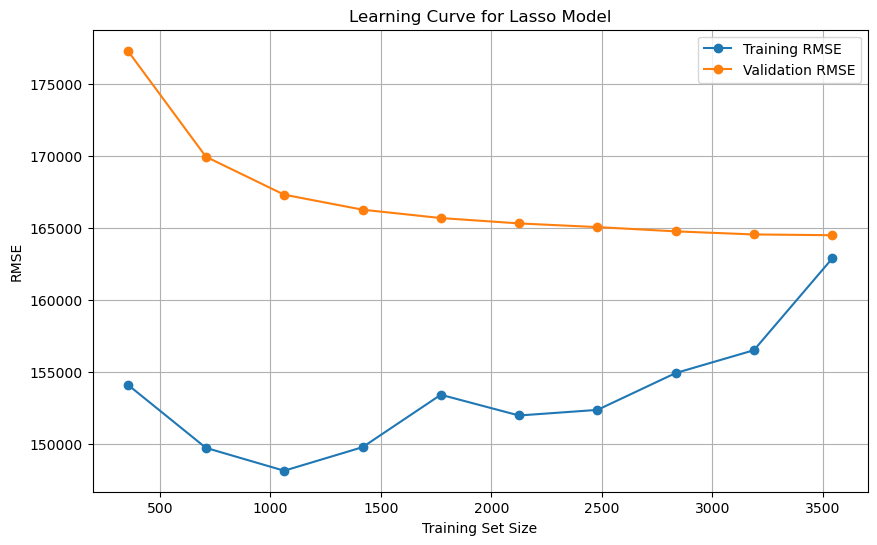

In [229]:
# evaluate best models from grid search
best_ridge = ridge_search.best_estimator_
best_lasso = lasso_search.best_estimator_

models = {
    'Best Ridge': best_ridge,
    'Best Lasso': best_lasso
}

model_performance = model_selection(models, x_train, y_train, x_test, y_test)
print(model_performance)

cv_performance = cross_validation(models, x, y)
print(cv_performance)

# plot learning curve for the best model
train_sizes, train_scores, test_scores = learning_curve(
    best_lasso, x, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=123
)
train_rmse = np.sqrt(-train_scores)
test_rmse = np.sqrt(-test_scores)
train_rmse_mean = train_rmse.mean(axis=1)
test_rmse_mean = test_rmse.mean(axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse_mean, label='Training RMSE', marker='o')
plt.plot(train_sizes, test_rmse_mean, label='Validation RMSE', marker='o')
plt.title('Learning Curve for Lasso Model')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

In [193]:
# important features of best_lasso model
lasso_coefficients = pd.Series(best_lasso.coef_, index=x.columns)
print(lasso_coefficients.head(14))
print("\nTop 10 important features based on absolute coefficients:")
print(lasso_coefficients.abs().sort_values(ascending=False).head(10))

bedrooms           -203712.681205
sqft_living         126626.882168
sqft_lot             -6959.093795
floors               39039.230612
waterfront          258266.677919
view                180963.714159
condition           105059.057595
sqft_above           75006.477066
sqft_basement            0.000000
house_age            36833.770154
bathroom_full       229839.709568
bathroom_half        19701.678165
bathroom_quarter     32034.236887
has_renovated         2427.812514
dtype: float64

Top 10 important features based on absolute coefficients:
city_Clyde Hill       766628.059994
city_Medina           737121.634188
city_Mercer Island    423011.748391
city_Bellevue         301324.463579
waterfront            258266.677919
bathroom_full         229839.709568
city_Kirkland         216232.311507
city_Seattle          211773.193564
bedrooms              203712.681205
city_Redmond          195408.202516
dtype: float64


### Model Prediction

In [195]:
# add default input for prediction using mode and mean values
mode_columns = ["bedrooms", "bathroom_full", "bathroom_half", "bathroom_quarter", "condition", "view", "floors", "waterfront", "has_renovated"]
mean_columns = ["sqft_living", "sqft_lot", "sqft_basement", "sqft_above", "house_age"]

default_input = {}
for col in mode_columns:
    default_input[col] = cleaned_data_raw[col].mode()[0]
for col in mean_columns:
    default_input[col] = round(cleaned_data_raw[col].mean(), 2)

default_city = 'Seattle' # default city for prediction

In [196]:
# save the best model
best_model = best_lasso

artifact = {
    'model': best_model,
    'features': x.columns.tolist(),
    'discrete_features': discrete_cols,
    'continuous_features': continuous_cols,
    'discrete_scaler': discrete_scaler,
    'continuous_scaler': continuous_scaler,
    'default_input': default_input,
    'default_city': default_city,
}
joblib.dump(artifact, 'model/best_model.pkl')

['model/best_model.pkl']

In [197]:
class HousePricePredictor:
    def __init__(self, model_path='model/best_model.pkl'):
        self.artifact = joblib.load(model_path)
        self.model = self.artifact['model']
        self.features = self.artifact['features']
        self.discrete_features = self.artifact['discrete_features']
        self.continuous_features = self.artifact['continuous_features']
        self.discrete_scaler = self.artifact['discrete_scaler']
        self.continuous_scaler = self.artifact['continuous_scaler']
        self.default_input = self.artifact['default_input']
        self.default_city = self.artifact['default_city']
    
    def prepare_input(self, input_data):
        # create a DataFrame with default values
        input_df = pd.DataFrame([self.default_input])
        
        # update with user input
        for key, value in input_data.items():
            if key in input_df.columns:
                input_df.at[0, key] = value
        
        # handle city one-hot encoding
        city_columns = [col for col in self.features if col.startswith('city_')]
        for col in city_columns:
            input_df[col] = 0
        city_col_name = f"city_{input_data.get('city', self.default_city)}"
        if city_col_name in city_columns:
            input_df.at[0, city_col_name] = 1
        
        return input_df[self.features]
    
    def preprocess_input(self, input_data):
        input_df = self.prepare_input(input_data)
        
        # scale discrete features
        input_df[discrete_cols] = discrete_scaler.transform(input_df[discrete_cols])
        
        # scale continuous features
        input_df[continuous_cols] = continuous_scaler.transform(input_df[continuous_cols])
        
        return input_df
    
    def predict(self, input_data):
        processed_input = self.preprocess_input(input_data)
        predicted_price = self.model.predict(processed_input)
        return predicted_price[0]

In [232]:
predictor = HousePricePredictor('model/best_model.pkl')

# example usage
input_data = {
    'bedrooms': 3,
    'bathroom_full': 2,
    'sqft_living': 1500,
    'city': 'Kent'
}

predicted_price = predictor.predict(input_data)
print(f"Predicted house price: ${predicted_price:,.2f}")

Predicted house price: $244,474.94
